In [2]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv("sample.csv")
df.head()

,Name,Age,Income($),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Rob,27,70000,NaN,NaN,NaN,NaN
1,Michael,29,90000,NaN,NaN,NaN,NaN
2,Mohan,29,61000,NaN,NaN,NaN,NaN
3,Ismail$,28,60000,NaN,NaN,NaN,NaN
4,Kroy,42,150000,NaN,NaN,NaN,NaN


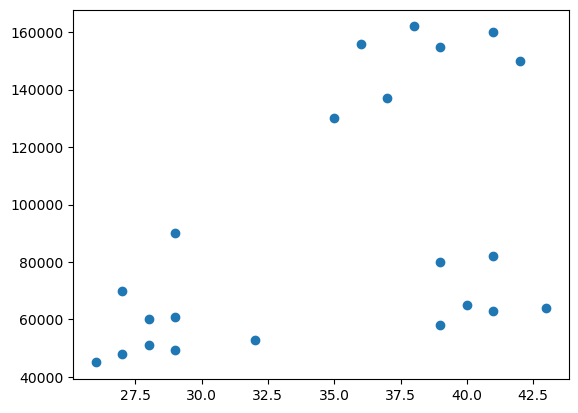

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km = KMeans(n_clusters=3)
km 

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [7]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,cluster
0,Rob,27,70000,NaN,NaN,NaN,NaN,0
1,Michael,29,90000,NaN,NaN,NaN,NaN,0
2,Mohan,29,61000,NaN,NaN,NaN,NaN,2
3,Ismail$,28,60000,NaN,NaN,NaN,NaN,2
4,Kroy,42,150000,NaN,NaN,NaN,NaN,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


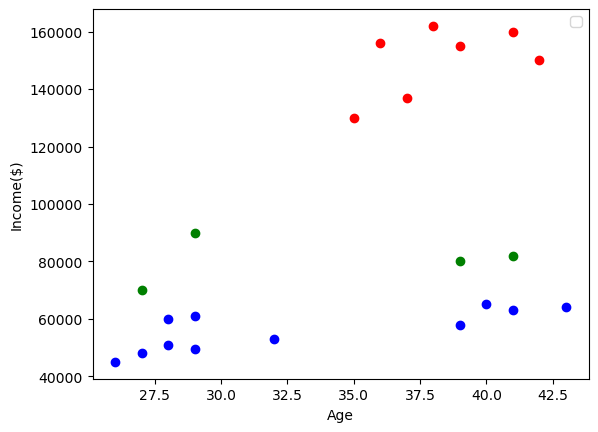

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Warum passt es jetzt nicht?
- Scale von den Features passt nicht
- Deshalb muss man MinMaxScaler verwenden

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,cluster
0,Rob,0.058824,0.213675,NaN,NaN,NaN,NaN,0
1,Michael,0.176471,0.384615,NaN,NaN,NaN,NaN,0
2,Mohan,0.176471,0.136752,NaN,NaN,NaN,NaN,2
3,Ismail$,0.117647,0.128205,NaN,NaN,NaN,NaN,2
4,Kroy,0.941176,0.897436,NaN,NaN,NaN,NaN,1
5,Gautman,0.764706,0.940171,NaN,NaN,NaN,NaN,1
6,David,0.882353,0.982906,NaN,NaN,NaN,NaN,1
7,Andrea,0.705882,1.000000,NaN,NaN,NaN,NaN,1
8,Brad,0.588235,0.948718,NaN,NaN,NaN,NaN,1
9,Angelina,0.529412,0.726496,NaN,NaN,NaN,NaN,1


In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,cluster
0,Rob,0.058824,0.213675,NaN,NaN,NaN,NaN,1
1,Michael,0.176471,0.384615,NaN,NaN,NaN,NaN,1
2,Mohan,0.176471,0.136752,NaN,NaN,NaN,NaN,1
3,Ismail$,0.117647,0.128205,NaN,NaN,NaN,NaN,1
4,Kroy,0.941176,0.897436,NaN,NaN,NaN,NaN,0
5,Gautman,0.764706,0.940171,NaN,NaN,NaN,NaN,0
6,David,0.882353,0.982906,NaN,NaN,NaN,NaN,0
7,Andrea,0.705882,1.000000,NaN,NaN,NaN,NaN,0
8,Brad,0.588235,0.948718,NaN,NaN,NaN,NaN,0
9,Angelina,0.529412,0.726496,NaN,NaN,NaN,NaN,0


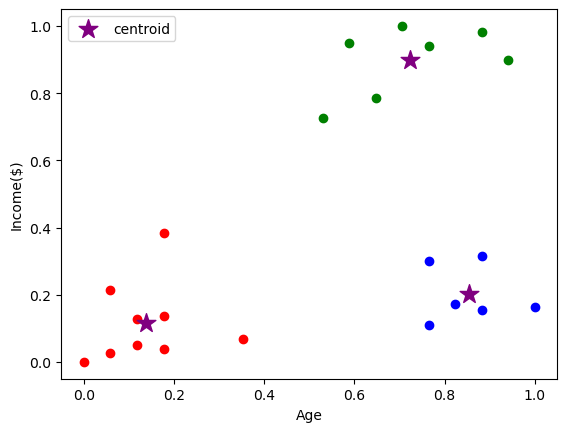

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=200)

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Technique

In [15]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.22443334487241418,
 0.16858512236029755,
 0.13706529523670866,
 0.11612804668175383]

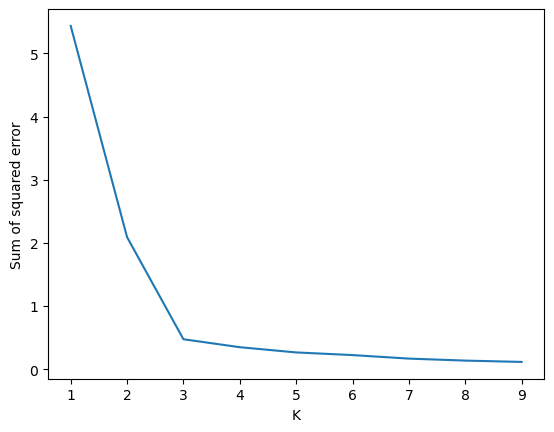

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)